In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
NO2_df = pd.read_csv('Data/Timeseries/delhi_NO2_TimeSeries.csv',parse_dates=[0]).set_index('date') 
SO2_df = pd.read_csv('Data/Timeseries/delhi_SO2_TimeSeries.csv',parse_dates=[0]).set_index('date').iloc[:60,:] 
O3_df = pd.read_csv('Data/Timeseries/delhi_O3_TimeSeries.csv',parse_dates=[0]).set_index('date')
HCHO_df = pd.read_csv('Data/Timeseries/delhi_HCHO_TimeSeries.csv',parse_dates=[0]).set_index('date')

In [46]:
DELHI_POLLUTANTS_DF = pd.concat([NO2_df,SO2_df,O3_df,HCHO_df],axis=1).drop('airshed',axis=1)
DELHI_POLLUTANTS_DF.head()

,tropospheric_NO2_column_number_density,SO2_column_number_density,O3_column_number_density,tropospheric_HCHO_column_number_density
date,,,,
2019-01-15,0.000108,0.000097,0.112238,0.000189
2019-01-30,0.000101,0.000058,0.120936,0.000187
2019-02-15,0.000106,0.000421,0.121295,0.000221
2019-03-02,0.000058,0.000133,0.114757,0.000190
2019-03-15,0.000058,0.000172,0.120502,0.000184


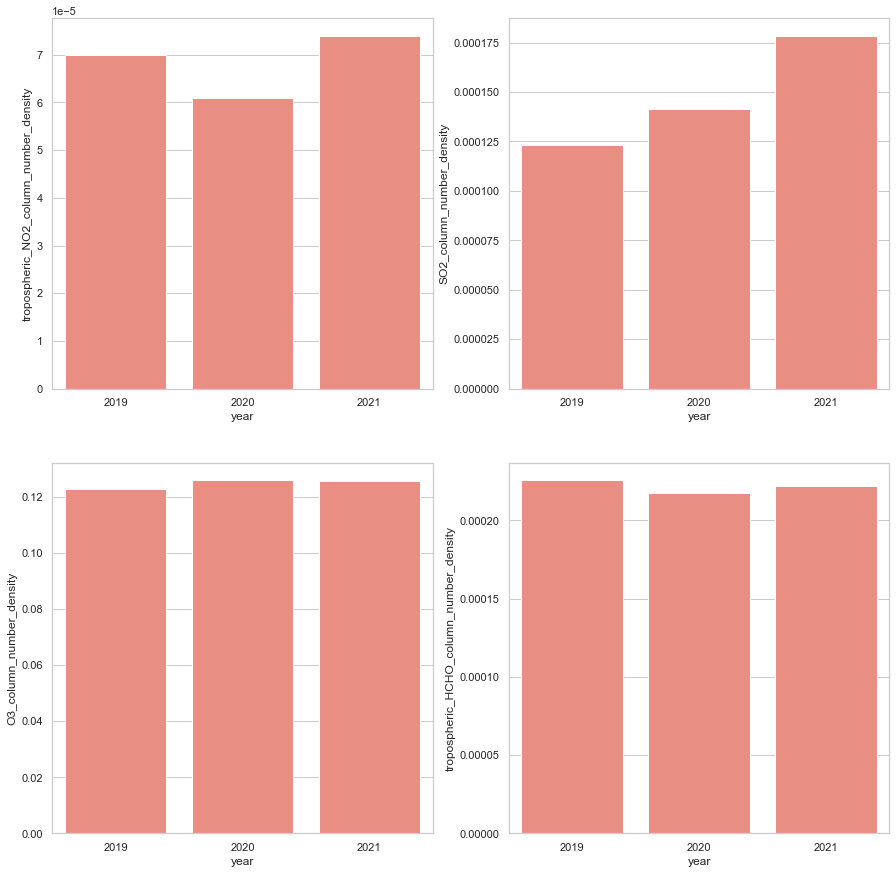

In [50]:
# Yearly means
delhi_df_yearlymeans = DELHI_POLLUTANTS_DF['2017':'2021'].resample('Y').mean()
delhi_df_yearlymeans['year'] =delhi_df_yearlymeans.index.year 

sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
axs = axs.flatten()
for counter, metric in enumerate(delhi_df_yearlymeans.drop('year',axis=1).columns):
    #clrs = ['red' if ((x==2020)|(x==2021)) else 'salmon' for x in delhi_df_yearlymeans.year]
    clrs = ['salmon']
    sns.barplot(x="year", y=metric, data=delhi_df_yearlymeans,
                palette=clrs,
                ax=axs[counter])
plt.show()